<a href="https://colab.research.google.com/github/CruzElizorios/programacion-2-python/blob/main/TP_prog2_def_ElizondoRios_Juarez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes

---



*   Elizondo Rios, Iñaki Cruz
*   Juarez, Leandro Santiago



In [1]:
import pandas as pd

# Carga de Datos

In [2]:
import requests
linea144_2020 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2020.csv"
linea144_2021 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-2021.csv"
linea144_2022 = "https://datos-abiertos.mingeneros.gob.ar/datos/linea144-enero-diciembre-2022.csv"

def descargarCSV(url, archivo_salida):
    print("Descargando archivo...")
    consulta = requests.get(url)
    contenido = consulta.content

    print("Guardando archivo...")
    # Abrir conexion en modo escritura
    with open(archivo_salida, "w", encoding="utf-8-sig") as archivo:
        # Escribir el contenido de la consulta
        archivo.write(contenido.decode("utf-8-sig"))

    print("¡Archivo descargado con éxito!")

descargarCSV(linea144_2020, "linea144_2020.csv")
descargarCSV(linea144_2021, "linea144_2021.csv")
descargarCSV(linea144_2022, "linea144_2022.csv")

Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!
Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!
Descargando archivo...
Guardando archivo...
¡Archivo descargado con éxito!


Juntamos los archivos en uno solo

In [3]:
#conociendo los datos
df1 = pd.read_csv("linea144_2020.csv")
df2 = pd.read_csv("linea144_2021.csv")
df3 = pd.read_csv("linea144_2022.csv") # ultima columna toda vacia borrar
df3=df3.rename(columns={"Fecha": "Nueva_fecha"})
df3

,Nueva_fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora,Unnamed: 19
0,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon,NaN
1,2022-01-01,Buenos Aires,Mujer,31.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Otro familiar,Varon,NaN
2,2022-01-01,Ciudad Autónoma de Buenos Aires,Mujer,29.0,Boliviana,Si,Si,No,Si,No,Si,No,No,No,No,No,No,Ex pareja,Varon,NaN
3,2022-01-01,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon,NaN
4,2022-01-01,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24553,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,NaN
24554,2022-12-31,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon,NaN
24555,2022-12-31,NaN,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,NaN,Varon,NaN
24556,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Padre o tutor,Varon,NaN


# Unificación y Limpieza de Datos

In [4]:
archivos = ["linea144_2020.csv","linea144_2021.csv","linea144_2022.csv"]
lista_dataframes = []
for archivo in archivos:
  df = pd.read_csv(archivo)
  df=df.rename(columns={"Fecha": "fecha"})
  lista_dataframes.append(df)

# juntamos los tres archivos en un solo dataframe
dft = pd.concat(lista_dataframes, ignore_index= True)
# eliminamos la ultima columna que no contiene valores
dft = dft.drop(df.columns[-1], axis=1)
dft

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,2020-01-01,Tucumán,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
1,2020-01-01,Buenos Aires,Mujer,39.0,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
2,2020-01-01,Buenos Aires,Mujer,22.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
3,2020-01-01,Buenos Aires,Mujer,53.0,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
4,2020-01-01,Buenos Aires,Mujer,38.0,Argentina,Si,Si,No,No,No,Si,No,No,No,No,No,No,Pareja,Varon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79560,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,NaN,No,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
79561,2022-12-31,Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Ex pareja,Varon
79562,2022-12-31,NaN,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,NaN,Varon
79563,2022-12-31,Ciudad Autónoma de Buenos Aires,Mujer,NaN,NaN,Si,Si,No,No,No,Si,No,No,No,No,No,No,Padre o tutor,Varon


Se exploran los tipo de datos de cada campo

In [5]:
dft.dtypes

,0
fecha,object
prov_residencia_persona_en_situacion_violencia,object
genero_persona_en_situacion_de_violencia,object
edad_persona_en_situacion_de_violencia,float64
pais_nacimiento_persona_en_situacion_de_violencia,object
tipo_de_violencia_fisica,object
tipo_de_violencia_psicologica,object
tipo_de_violencia_sexual,object
tipo_de_violencia_economica_y_patrimonial,object
tipo_de_violencia_simbolica,object


Para evitar problemas con mayúsculas o minúsculas

In [6]:
columnas_a_transformar = dft.select_dtypes(include="object").columns.difference(["fecha", "edad_persona_en_situacion_de_violencia"])
# Aplicar transformación
dft[columnas_a_transformar] = dft[columnas_a_transformar].apply(lambda col: col.str.lower())
dft

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
0,2020-01-01,tucumán,mujer,NaN,NaN,si,si,no,no,no,si,no,no,no,no,no,no,pareja,varon
1,2020-01-01,buenos aires,mujer,39.0,NaN,si,si,no,no,no,si,no,no,no,no,no,no,ex pareja,varon
2,2020-01-01,buenos aires,mujer,22.0,argentina,si,si,no,no,no,si,no,no,no,no,no,no,ex pareja,varon
3,2020-01-01,buenos aires,mujer,53.0,NaN,no,si,no,no,no,si,no,no,no,no,no,no,pareja,varon
4,2020-01-01,buenos aires,mujer,38.0,argentina,si,si,no,no,no,si,no,no,no,no,no,no,pareja,varon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79560,2022-12-31,ciudad autónoma de buenos aires,mujer,NaN,NaN,no,si,no,no,no,si,no,no,no,no,no,no,ex pareja,varon
79561,2022-12-31,buenos aires,mujer,NaN,NaN,si,si,no,no,no,si,no,no,no,no,no,no,ex pareja,varon
79562,2022-12-31,NaN,mujer,NaN,NaN,si,si,no,no,no,si,no,no,no,no,no,no,NaN,varon
79563,2022-12-31,ciudad autónoma de buenos aires,mujer,NaN,NaN,si,si,no,no,no,si,no,no,no,no,no,no,padre o tutor,varon


Se puede ver que varón trans se encuentra repetido

In [7]:
dft["genero_persona_en_situacion_de_violencia"].value_counts()

,count
genero_persona_en_situacion_de_violencia,
mujer,77299
varon,286
transgenero,128
mujer trans,113
otro,58
varón trans,13
travesti,11
varon trans,9
intersexual,4


In [8]:
dft["genero_persona_en_situacion_de_violencia"] = dft["genero_persona_en_situacion_de_violencia"].replace("varón trans", "varon trans")
dft["genero_persona_en_situacion_de_violencia"].value_counts()

,count
genero_persona_en_situacion_de_violencia,
mujer,77299
varon,286
transgenero,128
mujer trans,113
otro,58
varon trans,22
travesti,11
intersexual,4
no binarie,2


In [9]:
dft["genero_de_la_persona_agresora"].value_counts()

,count
genero_de_la_persona_agresora,
varon,70152
mujer,934
otro,206
varon trans,20
transgenero,8
mujer trans,7
travesti,2
queer,1


In [10]:
dft["vinculo_con_la_persona_agresora"].value_counts()

,count
vinculo_con_la_persona_agresora,
ex pareja,37383
pareja,28731
otro,5992
otro familiar,2996
padre o tutor,976
superior jerarquico,353
madre o tutor,142


In [11]:
columnas_excluidas = [
    "fecha",
    "edad_persona_en_situacion_de_violencia",
    "pais_nacimiento_persona_en_situacion_de_violencia",
    "prov_residencia_persona_en_situacion_violencia"
]

columnas_a_categorizar = dft.columns.difference(columnas_excluidas)
#columnas_a_categorizar
# Convertir las columnas seleccionadas a tipo 'category'
dft[columnas_a_categorizar] = dft[columnas_a_categorizar].astype("category")

# Verificar los tipos de datos
dft.dtypes

,0
fecha,object
prov_residencia_persona_en_situacion_violencia,object
genero_persona_en_situacion_de_violencia,category
edad_persona_en_situacion_de_violencia,float64
pais_nacimiento_persona_en_situacion_de_violencia,object
tipo_de_violencia_fisica,category
tipo_de_violencia_psicologica,category
tipo_de_violencia_sexual,category
tipo_de_violencia_economica_y_patrimonial,category
tipo_de_violencia_simbolica,category


In [12]:
#Exploramos como fueron escritas las juristicciones a los fines de identificar problemas
dft["prov_residencia_persona_en_situacion_violencia"].value_counts()

,count
prov_residencia_persona_en_situacion_violencia,
buenos aires,43579
ciudad autónoma de buenos aires,15470
santa fe,3263
tucumán,2828
mendoza,2791
córdoba,1526
salta,1111
jujuy,1102
chaco,682


In [13]:
#Se cuenta la cantidad de jurisicciones presentes.
dft["prov_residencia_persona_en_situacion_violencia"].value_counts().count()

25

Podemos ver que se encuentran provincias repetidas debido a que algunas estan con mayusculas y otras no, por eso para estandarizar los nombres actualizamos sus valores a solo la primera letra en mayuscula.
Un caso particular es  Córdoba que se encuentra con tilde y sin tilde, su unifica con tilde.

In [14]:
dft["prov_residencia_persona_en_situacion_violencia"] = dft["prov_residencia_persona_en_situacion_violencia"].str.title()
dft["prov_residencia_persona_en_situacion_violencia"].value_counts()

,count
prov_residencia_persona_en_situacion_violencia,
Buenos Aires,43579
Ciudad Autónoma De Buenos Aires,15470
Santa Fe,3263
Tucumán,2828
Mendoza,2791
Córdoba,1526
Salta,1111
Jujuy,1102
Chaco,682


In [15]:
dft["prov_residencia_persona_en_situacion_violencia"] = dft["prov_residencia_persona_en_situacion_violencia"].replace("Cordoba", "Córdoba")
dft["prov_residencia_persona_en_situacion_violencia"].value_counts().count()


24

A continuación se exploran los campos sin valores (Nan) a los finde de ver su relevancia en cada campo.

In [16]:
dft.isna().sum()

,0
fecha,0
prov_residencia_persona_en_situacion_violencia,1164
genero_persona_en_situacion_de_violencia,1641
edad_persona_en_situacion_de_violencia,15458
pais_nacimiento_persona_en_situacion_de_violencia,26869
tipo_de_violencia_fisica,0
tipo_de_violencia_psicologica,0
tipo_de_violencia_sexual,0
tipo_de_violencia_economica_y_patrimonial,0
tipo_de_violencia_simbolica,0


Se analiza  la relevancia porcentual de los valores nulos sobre el total

In [17]:
dft_porcentajes_nulos = pd.DataFrame()
dft_porcentajes_nulos["Cantidad Nulos"] = dft.isna().sum()
dft_porcentajes_nulos["Porcentaje Nulos"]= round((dft.isna().sum() / dft.count()) * 100, 2)
dft_porcentajes_nulos

,Cantidad Nulos,Porcentaje Nulos
fecha,0,0.00
prov_residencia_persona_en_situacion_violencia,1164,1.48
genero_persona_en_situacion_de_violencia,1641,2.11
edad_persona_en_situacion_de_violencia,15458,24.11
pais_nacimiento_persona_en_situacion_de_violencia,26869,50.99
tipo_de_violencia_fisica,0,0.00
tipo_de_violencia_psicologica,0,0.00
tipo_de_violencia_sexual,0,0.00
tipo_de_violencia_economica_y_patrimonial,0,0.00
tipo_de_violencia_simbolica,0,0.00


<Axes: ylabel='Porcentaje Nulos'>

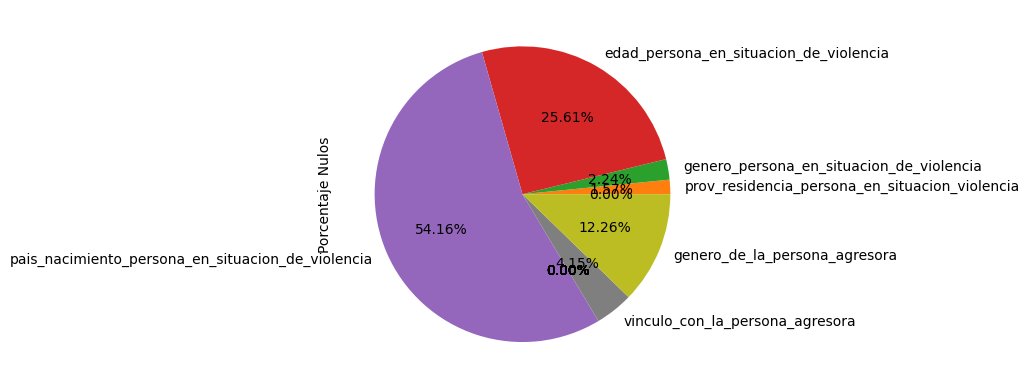

In [18]:
columnasin= dft_porcentajes_nulos["Porcentaje Nulos"].reset_index(drop=True)

dft_porcentajes_nulos["Porcentaje Nulos"].plot.pie(x=dft_porcentajes_nulos.index, y=columnasin,labels=dft_porcentajes_nulos.index,autopct='%1.2f%%')

Se explora el campo país de nacimiento dada su relevancia en cuanto a valores nulos (NaN), no le asignamos valores dado que no haremos análisis de datos que referencien a la nacionalidad, por lo cual no tiene relevancia la carencia del dato.

In [19]:
dft["pais_nacimiento_persona_en_situacion_de_violencia"].value_counts(dropna=False)
#dft["prov_residencia_persona_en_situacion_violencia"].value_counts()

,count
pais_nacimiento_persona_en_situacion_de_violencia,
argentina,47001
NaN,26869
paraguaya,2296
boliviana,1171
peruana,898
venezolana,412
colombiana,215
uruguaya,180
brasileña,128


# Análisis Descriptivo

Análisis Descriptivo de edades de la persona en situacion de violencia

Se realiza un análisis exploratorio de datos, respecto de la edad, se utiliza la grafica de "Caja y Bigotes" el método .boxplot conforme a la documentación ya excluye los valores de tipo NaN.

In [20]:
dft["edad_persona_en_situacion_de_violencia"].describe()

,edad_persona_en_situacion_de_violencia
count,64107.000000
mean,35.731199
std,12.651079
min,1.000000
25%,27.000000
50%,34.000000
75%,42.000000
max,127.000000


Se analiza la dispersión de las edades de las personas que sufren violencia, se puede observar que hay un valor atípico que está por encima de los 110 años, lo cual es muy probable que sea un error de carga. El resto de los valores son posibles

<Axes: title={'center': 'Composición de Edades'}, ylabel='Edades'>

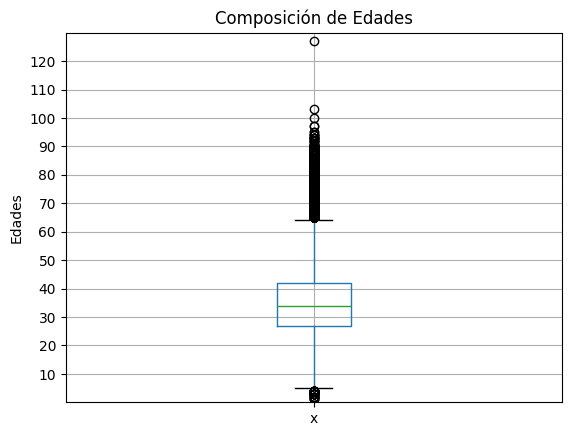

In [21]:
#GRAFICO DE CAJA
graficoEdades = pd.DataFrame.boxplot(dft["edad_persona_en_situacion_de_violencia"])
graficoEdades.set_title("Composición de Edades")
graficoEdades.set_ylabel("Edades")
graficoEdades.set_ylim(0, 130)  # valores minimos y maximos
graficoEdades.set_yticks(range(10, 130,10)) #  Lineas auxiliares pimer valor, valor máximo, valor minimo
graficoEdades

In [22]:
dft[dft["edad_persona_en_situacion_de_violencia"] >= 110]

,fecha,prov_residencia_persona_en_situacion_violencia,genero_persona_en_situacion_de_violencia,edad_persona_en_situacion_de_violencia,pais_nacimiento_persona_en_situacion_de_violencia,tipo_de_violencia_fisica,tipo_de_violencia_psicologica,tipo_de_violencia_sexual,tipo_de_violencia_economica_y_patrimonial,tipo_de_violencia_simbolica,tipo_de_violencia_domestica,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras,vinculo_con_la_persona_agresora,genero_de_la_persona_agresora
47135,2021-09-10,Ciudad Autónoma De Buenos Aires,NaN,127.0,venezolana,no,no,si,no,no,no,no,no,no,no,no,si,padre o tutor,NaN


Se analiza la dispersión de edades de las personas que sufren violencia segun su género

<Axes: title={'center': 'Composición de Edades'}, xlabel='genero_persona_en_situacion_de_violencia', ylabel='Edades'>

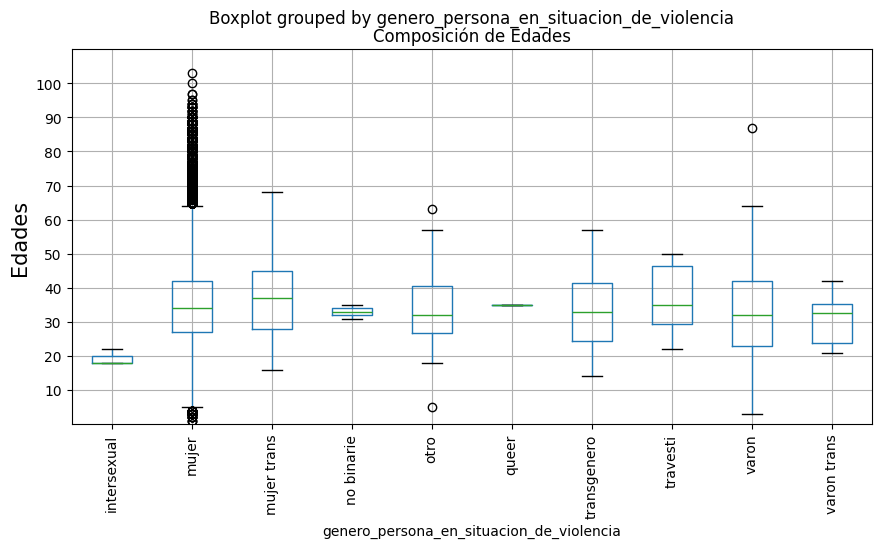

In [23]:
graficoEdades_por_genero = dft.boxplot("edad_persona_en_situacion_de_violencia",
                            by="genero_persona_en_situacion_de_violencia",
                            rot=90, figsize=(10, 5))
graficoEdades_por_genero.set_title("Composición de Edades")
graficoEdades_por_genero.set_ylabel("Edades",fontsize=15)
graficoEdades_por_genero.set_ylim(0, 110)  # valores minimos y maximos
graficoEdades_por_genero.set_yticks(range(10, 110,10))
graficoEdades_por_genero

# Análisis Temporal

Se exploran la cantidad de llamadas por año, para ello se utiliza el campo fecha que está presente en todos los registros. Contando la cantidad de fechas, obtendremos la cantidad de llamados.

In [24]:
dft["fecha"] = pd.to_datetime(dft["fecha"])
#cantidad de llamadas por año
cant_llamados_anio = dft.groupby(dft["fecha"].dt.year)["fecha"].count()
cant_llamados_anio

,fecha
fecha,
2020,29706
2021,25301
2022,24558


Para el analisis temporal nos interesa
saber cual ha sido la demanda de la línea 144 según el mes del año.

Tiene por utilidad poder programar los recursos destinados a la atención del servicio según la época del año.

In [25]:
import matplotlib.pyplot as plt

anio2020 = dft[dft["fecha"].dt.year == 2020]
anio2021 = dft[dft["fecha"].dt.year == 2021]
anio2022 = dft[dft["fecha"].dt.year == 2022]


cant_llamados_meses_anio = pd.DataFrame(anio2020.groupby(dft["fecha"].dt.month)["fecha"].count(),)
cant_llamados_meses_anio = cant_llamados_meses_anio.rename(columns={"fecha": "2020"})
cant_llamados_meses_anio["2021"] = pd.DataFrame(anio2021.groupby(dft["fecha"].dt.month)["fecha"].count())
cant_llamados_meses_anio["2022"] = pd.DataFrame(anio2022.groupby(dft["fecha"].dt.month)["fecha"].count())
cant_llamados_meses_anio["Mes"] = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
cant_llamados_meses_anio


,2020,2021,2022,Mes
fecha,,,,
1,2465,2124,2034,Enero
2,1993,2168,1964,Febrero
3,2550,2304,2429,Marzo
4,2996,2018,2129,Abril
5,2875,2027,2026,Mayo
6,2435,1869,1816,Junio
7,2648,2104,1860,Julio
8,2645,2219,2094,Agosto
9,2270,1950,2135,Septiembre


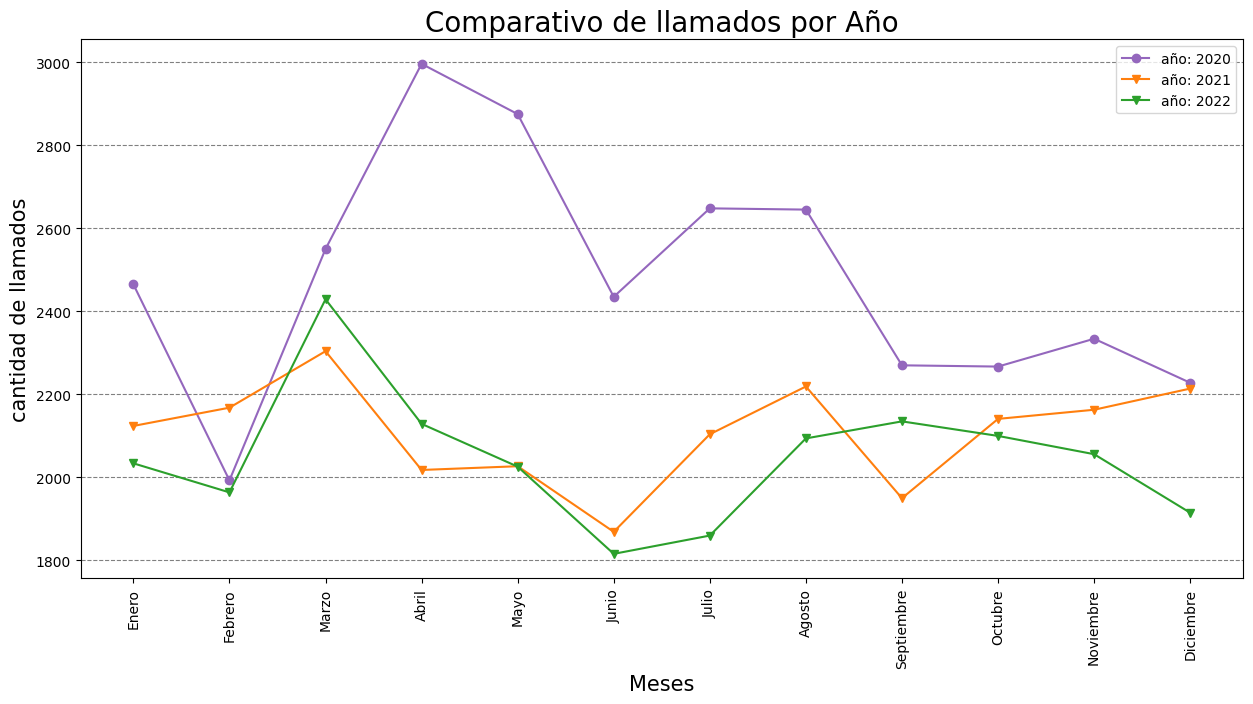

In [26]:
# gráfico de líneas comparativo
plt.figure(figsize = (15,7))
plt.xticks(rotation = 90, fontsize=10)
plt.xlabel('Meses',fontsize=15)
plt.ylabel('cantidad de llamados',fontsize=15)
plt.title(f'Comparativo de llamados por Año',fontsize=20)
plt.grid(axis = 'y', color = 'gray', linestyle = 'dashed')
plt.plot(cant_llamados_meses_anio["Mes"], cant_llamados_meses_anio["2020"], label = f'año: 2020', color = 'tab:purple', marker = 'o')
plt.plot(cant_llamados_meses_anio["Mes"], cant_llamados_meses_anio["2021"], label = f'año: 2021', color = 'tab:orange', marker = 'v')
plt.plot(cant_llamados_meses_anio["Mes"], cant_llamados_meses_anio["2022"], label = f'año: 2022', color = 'tab:green', marker = 'v')
plt.legend(loc = 'upper right')
plt.show()

Observamos por análisis del gráfico que los picos de demanda de la línea 144 ocurren en los meses de marzo y abril; con un fuerte decenso en junio

In [27]:
llamadas_mes_anio = dft.groupby([dft["fecha"].dt.year, dft["fecha"].dt.month])["fecha"].count()
ev_llamadas_mes_anio = pd.DataFrame(llamadas_mes_anio)

ev_llamadas_mes_anio = ev_llamadas_mes_anio.rename(columns={"fecha": "cantidad llamados"})
ev_llamadas_mes_anio

cantidad llamados
fecha fecha                   
2020  1                   2465
      2                   1993
      3                   2550
      4                   2996
      5                   2875
      6                   2435
      7                   2648
      8                   2645
      9                   2270
      10                  2267
      11                  2334
      12                  2228
2021  1                   2124
      2                   2168
      3                   2304
      4                   2018
      5                   2027
      6                   1869
      7                   2104
      8                   2219
      9                   1950
      10                  2141
      11                  2163
      12                  2214
2022  1                   2034
      2                   1964
      3                   2429
      4                   2129
      5                   2026
      6                   1816
      7                   1860
      8                   2094
      9                   2135
      10                  2100
      11                  2056
      12                  1915

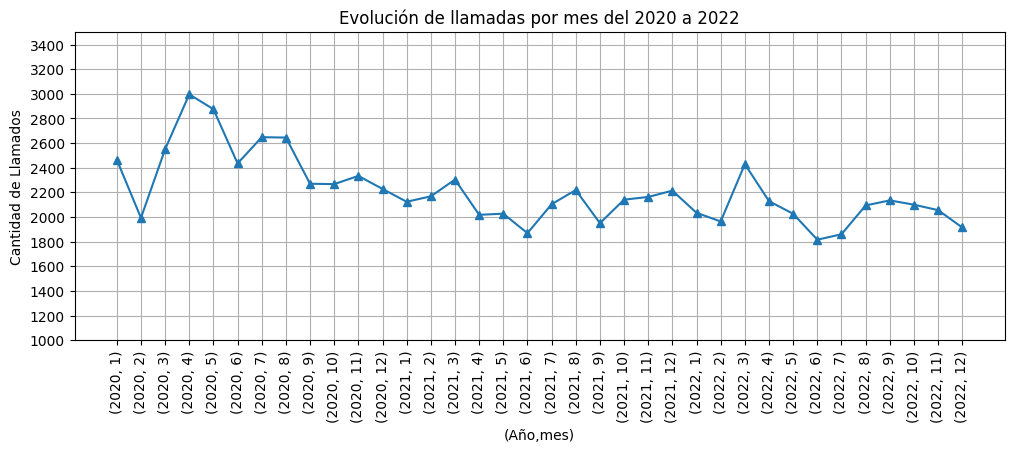

In [28]:
evol = ev_llamadas_mes_anio['cantidad llamados'].plot(kind='line', figsize=(12, 4), marker='^', title='Evolución de llamadas por mes del 2020 a 2022')

evol.set_ylim(1000, 3500)
evol.set_yticks(range(1000, 3500, 200))
evol.yaxis.grid(True)
evol.set_ylabel('Cantidad de Llamados')

evol.set_xticks(range(len(ev_llamadas_mes_anio)))
evol.set_xticklabels(ev_llamadas_mes_anio.index, rotation=90)
evol.xaxis.grid(True)
evol.set_xlabel('(Año,mes)')

plt.show()

Se puede ver que la tendencia de la cantidad de llamados recibidos a la línea 144 tiende a la baja, ya que el pico máximo histórico fue en abril del 2020 con unos 3000 llamados aproximadamente; mientras que el mínimo histórico es en junio del 2022 con aproximadamente 2000 llamados.

Este aumento en el primer año coincide con la época donde se encontraba en vigencia el confinamiento obligatorio por el COVID19

In [29]:
estadisticas = (
    dft.groupby(dft["fecha"].dt.year)["edad_persona_en_situacion_de_violencia"]
    .agg(media=lambda x: round(x.mean(),2),mediana="median",moda=lambda x: x.mode().iloc[0])
).rename_axis("año")
estadisticas


,media,mediana,moda
año,,,
2020,36.10,34.0,28.0
2021,35.68,33.0,30.0
2022,35.34,33.0,30.0


No hay grandes variaciones interanuales en las medidas de tendencia central relaciona con la edad de los denunciantes

# Preguntas de Investigación

*1) ¿Cuál es la modalidad más frecuente de violencia?*

---



In [30]:
modalidad_violencia = dft[[
                          "modalidad_de_violencia_institucional",
                          "modalidad_de_violencia_laboral",
                          "modalidad_violencia_contra_libertad_reproductiva",
                          "modalidad_de_violencia_obstetrica",
                          "modalidad_de_violencia_mediatica",
                          "modalidad_de_violencia_otras"]]
modalidad_violencia

,modalidad_de_violencia_institucional,modalidad_de_violencia_laboral,modalidad_violencia_contra_libertad_reproductiva,modalidad_de_violencia_obstetrica,modalidad_de_violencia_mediatica,modalidad_de_violencia_otras
0,no,no,no,no,no,no
1,no,no,no,no,no,no
2,no,no,no,no,no,no
3,no,no,no,no,no,no
4,no,no,no,no,no,no
...,...,...,...,...,...,...
79560,no,no,no,no,no,no
79561,no,no,no,no,no,no
79562,no,no,no,no,no,no
79563,no,no,no,no,no,no


Modalidad de la violencia:  
Para aquellos casos en donde si se haya tomado registro de un tipo de modalidad de violencia se explora la composición de las modalidades de violencia.




Text(0.5, 1.0, 'Distribución de modalidades de violencia')

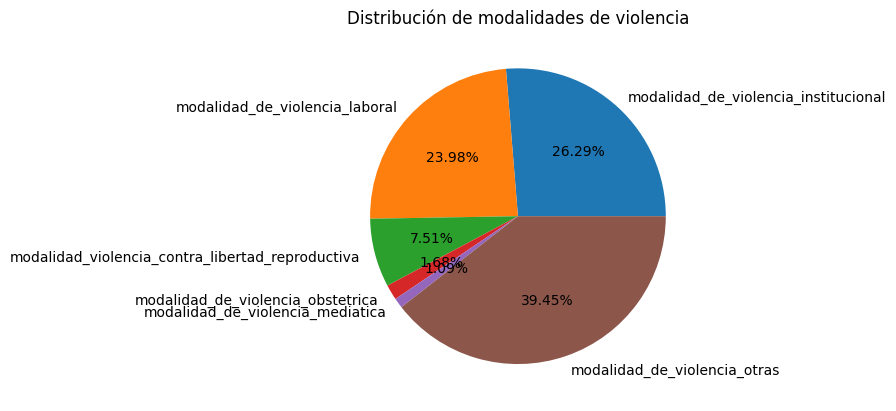

In [31]:
cantidad_si=(modalidad_violencia=="si").sum()
cantidad_si.name="cantidad"
cantidad_si.plot.pie(x=cantidad_si.index, y=cantidad_si, labels=cantidad_si.index,autopct='%1.2f%%',ylabel="")
plt.title("Distribución de modalidades de violencia")

Se puede observar que el 39.45% estan bajo la modalidad otras, y como casos
Violencia institucional (26.29%) y violencia laboral (23.98%) tienen una proporción significativa, esto sugiere que gran parte de los casos reportados no encajan dentro de las categorías específicas de violencia institucional, laboral, mediática, obstétrica, o contra la libertad reproductiva, lo cual podría indicar la necesidad de categorizar mejor estas situaciones o prestar mayor atención a tipos de violencia menos visibilizados.

*2) Análisis vincular en violencia doméstica*

---



Analizamos para el tipo de violencia doméstica el vínculo del agredido con el agresor

In [32]:
violencia_domestica_por_vinculo=dft["vinculo_con_la_persona_agresora"][dft["tipo_de_violencia_domestica"]=="si"].value_counts(normalize=True)*100
violencia_domestica_por_vinculo

,proportion
vinculo_con_la_persona_agresora,
ex pareja,51.984985
pareja,40.157547
otro familiar,3.890342
otro,2.474121
padre o tutor,1.283984
madre o tutor,0.196223
superior jerarquico,0.012797


Observamos que casi el 90% de los casos están relacionados con la pareja o la expareja del agredido

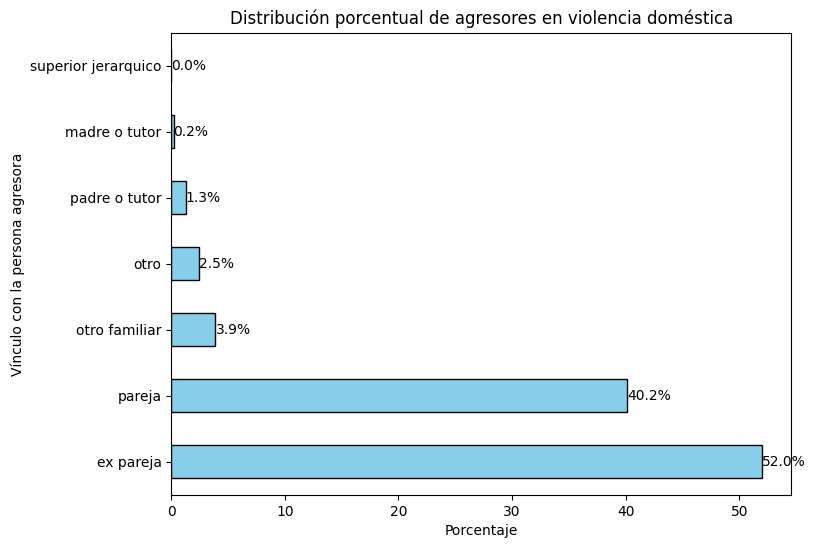

In [33]:
graf_barras_domestica_vinculo = violencia_domestica_por_vinculo.plot.barh(
    figsize=(8, 6),
    color="skyblue",
    edgecolor="black",
    title="Distribución porcentual de agresores en violencia doméstica"
)

# Añadir etiquetas a las barras
for container in graf_barras_domestica_vinculo.containers:
    graf_barras_domestica_vinculo.bar_label(container, fmt="%.1f%%")

graf_barras_domestica_vinculo.set_xlabel("Porcentaje")
graf_barras_domestica_vinculo.set_ylabel("Vínculo con la persona agresora")
plt.show()

*3) Violencia Sexual y Rango Etario* ---
¿Cambia la incidencia de este tipo de violencia según la edad?

---





In [34]:
dft['grupo_etario'] = pd.cut(dft['edad_persona_en_situacion_de_violencia'],
                             bins=[0, 12, 18, 65, 130],
                             labels=['niños','adolecentes','adulto', 'adulto mayor'])
dft['grupo_etario'].value_counts()

,count
grupo_etario,
adulto,59969
adolecentes,2024
adulto mayor,1922
niños,192


In [35]:
etario_vsexual= dft.groupby("grupo_etario")[["tipo_de_violencia_sexual"]].value_counts(normalize=True)*100
etario_vsexual = etario_vsexual.unstack()
etario_vsexual

<ipython-input-35-88a1e8df6c3f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  etario_vsexual= dft.groupby("grupo_etario")[["tipo_de_violencia_sexual"]].value_counts(normalize=True)*100


tipo_de_violencia_sexual,no,si
grupo_etario,,
niños,23.437500,76.562500
adolecentes,62.944664,37.055336
adulto,85.917724,14.082276
adulto mayor,92.872008,7.127992


In [36]:
etario_vsexual['si']

,si
grupo_etario,
niños,76.562500
adolecentes,37.055336
adulto,14.082276
adulto mayor,7.127992


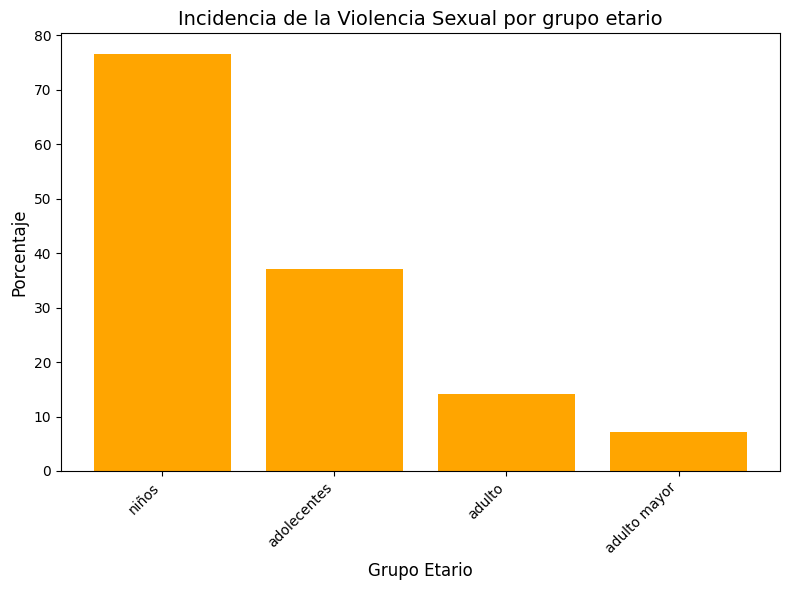

In [37]:
grupo_etario = etario_vsexual.index
etario_vsexual_si = etario_vsexual['si'].values

plt.figure(figsize=(8, 6))
plt.bar(grupo_etario, etario_vsexual_si, color='orange')
plt.xlabel('Grupo Etario', fontsize=12)
plt.ylabel('Porcentaje', fontsize=12)
plt.title('Incidencia de la Violencia Sexual por grupo etario', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa que la incidencia de la violencia sexual es inversamente proporcional a la edad del agredido. El grupo 'niños' es afectado un 76.56% mientras que en 'adulto mayor' un 7.12%

Integrantes

---



*   Elizondo Rios, Iñaki Cruz
*   Juarez, Leandro Santiago

